In [1]:
#30DayMapChallenge Day 14: Hexagons.
#This time I utilized the very intuitive tutorial from @mplsoccer_dev
#to create a pretty hexagon heat map of Liverpool's positioning in the 2018 and 2019 Champions League Finals!
#Data from @StatsBomb

In [2]:
#%matplotlib inline
from urllib.request import urlopen

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import ax_text

from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen

In [3]:
#Loading data and filtering to correct teams
parser = Sbopen()
df_2019 = parser.event(22912)[0]  # 0 index is the event file #22912
df_2018 = parser.event(18245)[0]  # 0 index is the event file #18245
df_2019 = df_2019.loc[df_2019.team_name == "Liverpool", ['x', 'y']]
df_2018 = df_2018.loc[df_2018.team_name == "Liverpool", ['x', 'y']]

In [4]:
#Custom color map
lRed_cmap = LinearSegmentedColormap.from_list("Liverpool - 10 colors",
                                                  ['#E05260', '#600304'], N=10)

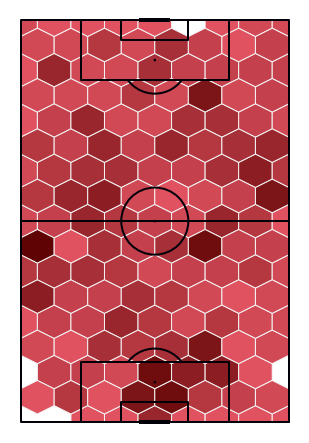

In [5]:
pitch = VerticalPitch(line_color='#000009', line_zorder=2, pitch_color='white')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
hexmap = pitch.hexbin(df_2019.x, df_2019.y, ax=ax, edgecolors='#f4f4f4',
                      gridsize=(8, 8), cmap=lRed_cmap)

In [6]:
#Setting fonts
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
URL2 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robotto_regular = FontManager(URL)
robboto_bold = FontManager(URL2)

In [7]:
# Load the StatsBomb logo and team logo
l_image = Image.open("Liverpool_FC.png")
SB_LOGO_URL = ('https://raw.githubusercontent.com/statsbomb/open-data/'
               'master/img/SB%20-%20Icon%20Lockup%20-%20Colour%20positive.png')
sb_logo = Image.open(urlopen(SB_LOGO_URL))

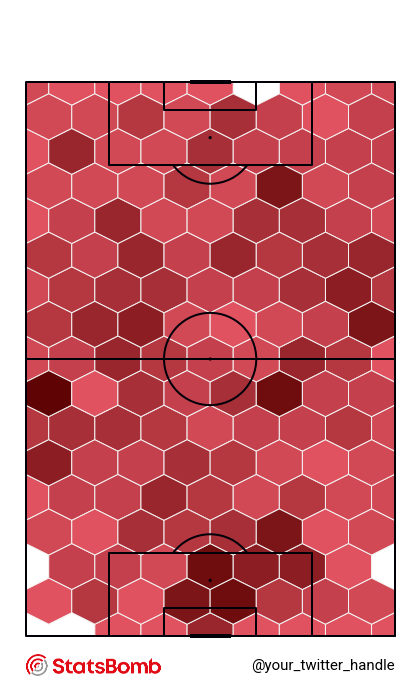

In [8]:
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0,
                      title_space=0,
                      axis=False,
                      grid_height=0.82, endnote_height=0.03)
hexmap = pitch.hexbin(df_2019.x, df_2019.y, ax=axs['pitch'], edgecolors='#f4f4f4',
                      gridsize=(8, 8), cmap=lRed_cmap)
axs['endnote'].text(1, 0.5, '@your_twitter_handle', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop)
axs['title'].text(0.5, 0.7, "", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.25, "", color='#000009',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=20)
ax_sb_logo = add_image(sb_logo, fig,
                       # set the left, bottom and height to align with the endnote
                       left=axs['endnote'].get_position().x0,
                       bottom=axs['endnote'].get_position().y0,
                       height=axs['endnote'].get_position().height)

In [9]:
#Set the second color map
lGreen_cmap = LinearSegmentedColormap.from_list("LiverpoolG - 10 colors",
                                                  ['#3BA393', '#145449'], N=10)

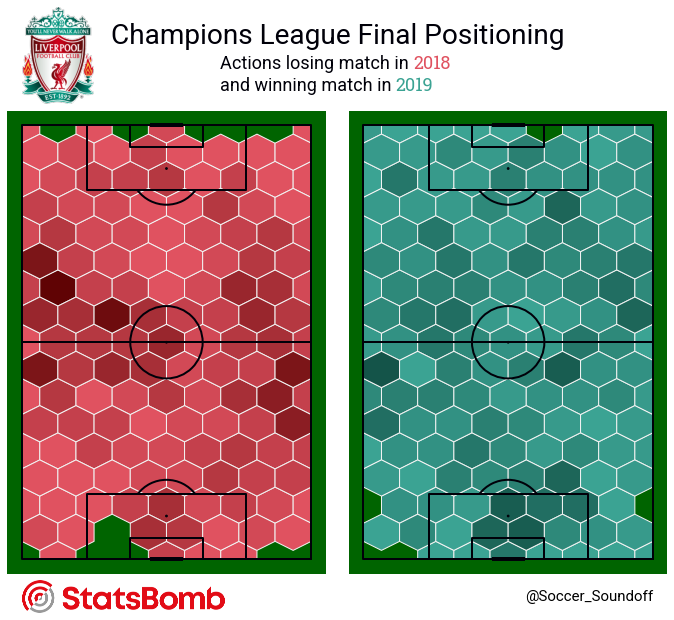

In [10]:
pitch = VerticalPitch(line_color='#000009', line_zorder=2, pitch_color='darkgreen')
fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)
hexmap_before = pitch.hexbin(df_2018.x, df_2018.y, ax=axs['pitch'][0],
                             edgecolors='#f4f4f4',
                             gridsize=(8, 8), cmap=lRed_cmap)
hexmap2_after = pitch.hexbin(df_2019.x, df_2019.y, ax=axs['pitch'][1], edgecolors='#f4f4f4',
                             gridsize=(8, 8), cmap=lGreen_cmap)
ax_sb_logo = add_image(sb_logo, fig,
                       # set the left, bottom and height to align with the endnote
                       left=axs['endnote'].get_position().x0,
                       bottom=axs['endnote'].get_position().y0,
                       height=axs['endnote'].get_position().height)
ax_messi = add_image(l_image, fig, interpolation='hanning',
                     # set the left, bottom and height to align with the title
                     left=axs['title'].get_position().x0,
                     bottom=axs['title'].get_position().y0,
                     height=axs['title'].get_position().height)
#Setting the text for the final graphic
TITLE_STR1 = "Champions League Final Positioning"
TITLE_STR2 = 'Actions losing match in <2018> \nand winning match in <2019>'
title1_text = axs['title'].text(0.5, 0.7, TITLE_STR1, fontsize=28, color='#000009',
                                fontproperties=robotto_regular.prop,
                                ha='center', va='center')
highlight_text = [{'color': '#E05260', 'fontproperties': robboto_bold.prop},
                  {'color': '#3BA393', 'fontproperties': robboto_bold.prop}]
ax_text(0.5, 0.3, TITLE_STR2, ha='center', va='center', fontsize=18, color='#000009',
        fontproperties=robotto_regular.prop, highlight_textprops=highlight_text, ax=axs['title'])
axs['endnote'].text(1, 0.5, '@Soccer_Soundoff', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop)
plt.show() 